# BackEnd Projeto Integrador - Perfil do Eleitorado
## Elaborado por Rafael Roberto Lopes

### Os dados aqui apresentados se referem ao estado de São Paulo somente.

Importação da bibliotecas a serem utilizadas.

In [114]:
import pandas as pd
import matplotlib
#import dask
import matplotlib.pyplot as plt
import numpy as np

Leitura do arquivo csv do [Repositório de Dados Eleitorais](https://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1/repositorio-de-dados-eleitorais)</p>
Atente se o path utilizado está correto.

In [43]:
#from dask import dataframe as dd
#df = dd.read_csv("C:/Users/Rafael/Documents/Rafael/FATEC/API 1 Sem/perfil_eleitor_secao_2020_SP.csv", sep=";", error_bad_lines=False, encoding='Latin 1')
df = pd.read_csv("C:/Users/Rafael/Documents/Rafael/FATEC/API 1 Sem/perfil_eleitor_secao_2020_SP.csv", sep=";", error_bad_lines=False, encoding='Latin 1')

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16089463 entries, 0 to 16089462
Data columns (total 23 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   DT_GERACAO                  object
 1   HH_GERACAO                  object
 2   ANO_ELEICAO                 int64 
 3   SG_UF                       object
 4   CD_MUNICIPIO                int64 
 5   NM_MUNICIPIO                object
 6   CD_MUN_SIT_BIOMETRIA        int64 
 7   DS_MUN_SIT_BIOMETRIA        object
 8   NR_ZONA                     int64 
 9   NR_SECAO                    int64 
 10  CD_LOCAL_VOTACAO            object
 11  CD_GENERO                   int64 
 12  DS_GENERO                   object
 13  CD_ESTADO_CIVIL             int64 
 14  DS_ESTADO_CIVIL             object
 15  CD_FAIXA_ETARIA             int64 
 16  DS_FAIXA_ETARIA             object
 17  CD_GRAU_ESCOLARIDADE        int64 
 18  DS_GRAU_ESCOLARIDADE        object
 19  QT_ELEITORES_PERFIL         int64 
 20  

In [44]:
df.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,CD_MUN_SIT_BIOMETRIA,DS_MUN_SIT_BIOMETRIA,NR_ZONA,NR_SECAO,...,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,QT_ELEITORES_BIOMETRIA,QT_ELEITORES_DEFICIENCIA,QT_ELEITORES_INC_NM_SOCIAL
0,01/08/2020,09:34:32,2020,SP,61638,ARARAQUARA,0,Sem biometria,13,196,...,3,CASADO,7579,75 a 79 anos,8,SUPERIOR COMPLETO,1,1,0,0
1,01/08/2020,09:34:32,2020,SP,61638,ARARAQUARA,0,Sem biometria,13,196,...,3,CASADO,8084,80 a 84 anos,1,ANALFABETO,1,0,0,0
2,01/08/2020,09:34:32,2020,SP,61638,ARARAQUARA,0,Sem biometria,13,196,...,3,CASADO,8084,80 a 84 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,1,0,0,0
3,01/08/2020,09:34:32,2020,SP,61638,ARARAQUARA,0,Sem biometria,13,196,...,3,CASADO,8589,85 a 89 anos,2,LÊ E ESCREVE,2,0,0,0
4,01/08/2020,09:34:32,2020,SP,61638,ARARAQUARA,0,Sem biometria,13,196,...,3,CASADO,8589,85 a 89 anos,6,ENSINO MÉDIO COMPLETO,1,0,0,0


Array com os nomes de todas as colunas presentes no dataframe.</p>
Para uma descrição sobre o conteúdo de cada coluna consulte o LEIAME.pdf do "perfil_eleitor_secao_2020_SP.csv".

In [45]:
df.columns.values

array(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'SG_UF', 'CD_MUNICIPIO',
       'NM_MUNICIPIO', 'CD_MUN_SIT_BIOMETRIA', 'DS_MUN_SIT_BIOMETRIA',
       'NR_ZONA', 'NR_SECAO', 'CD_LOCAL_VOTACAO', 'CD_GENERO',
       'DS_GENERO', 'CD_ESTADO_CIVIL', 'DS_ESTADO_CIVIL',
       'CD_FAIXA_ETARIA', 'DS_FAIXA_ETARIA', 'CD_GRAU_ESCOLARIDADE',
       'DS_GRAU_ESCOLARIDADE', 'QT_ELEITORES_PERFIL',
       'QT_ELEITORES_BIOMETRIA', 'QT_ELEITORES_DEFICIENCIA',
       'QT_ELEITORES_INC_NM_SOCIAL'], dtype=object)

## Definição da Tabela Faixa Etária

Criação da tabela de faixa etária, selecionando a coluna DS_FAIXA_ETARIA do dataframe de eleitorado.

In [118]:
TabelaFaixaEtaria = df['DS_FAIXA_ETARIA']

Ajustando tabela para exibir a contagem por grupo e ordenada.

In [119]:
TabelaFaixaEtariaOrdenada = TabelaFaixaEtaria.value_counts().sort_index()

In [120]:
TabelaFaixaEtariaOrdenada

100 anos ou mais                    15090
16 anos                             10538
17 anos                             64008
18 anos                            165203
19 anos                            263506
20 anos                            303797
21 a 24 anos                       720734
25 a 29 anos                      1007065
30 a 34 anos                      1144269
35 a 39 anos                      1441207
40 a 44 anos                      1534599
45 a 49 anos                      1535643
50 a 54 anos                      1557620
55 a 59 anos                      1541389
60 a 64 anos                      1377450
65 a 69 anos                      1117289
70 a 74 anos                       826709
75 a 79 anos                       563088
80 a 84 anos                       392548
85 a 89 anos                       242599
90 a 94 anos                       162290
95 a 99 anos                       102546
Inválido                              276
Name: DS_FAIXA_ETARIA, dtype: int6

Gráfico de exibição dos dados de eleitores por faixa etária.

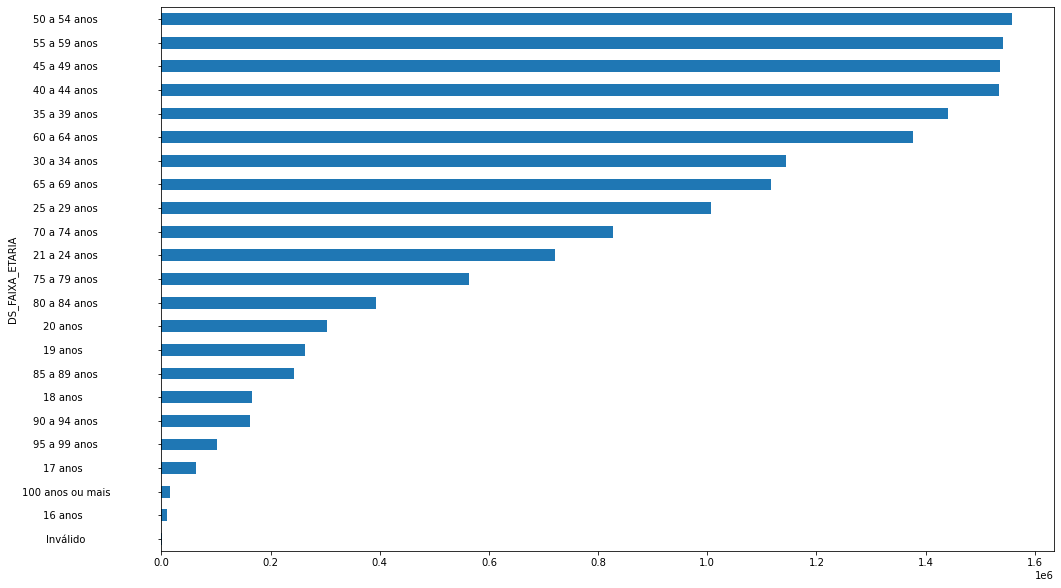

In [144]:
df.groupby('DS_FAIXA_ETARIA').size().sort_values().plot(kind='barh', figsize=(16,10))

## Definição da Tabela Estado Civil

Criação da tabela de estado civil, selecionando a coluna DS_ESTADO_CIVIL do dataframe de eleitorado.

In [121]:
TabelaEstadoCivil = df['DS_ESTADO_CIVIL']

Ajustando tabela para exibir a contagem por grupo e ordenada.

In [122]:
TabelaEstadoCivilOrdenada = TabelaEstadoCivil.value_counts().sort_index()

In [123]:
TabelaEstadoCivilOrdenada

CASADO                    6533036
DIVORCIADO                1435722
NÃO INFORMADO               20479
SEPARADO JUDICIALMENTE     429274
SOLTEIRO                  6783998
VIÚVO                      886954
Name: DS_ESTADO_CIVIL, dtype: int64

Gráfico de exibição dos dados de eleitores por estado civil.

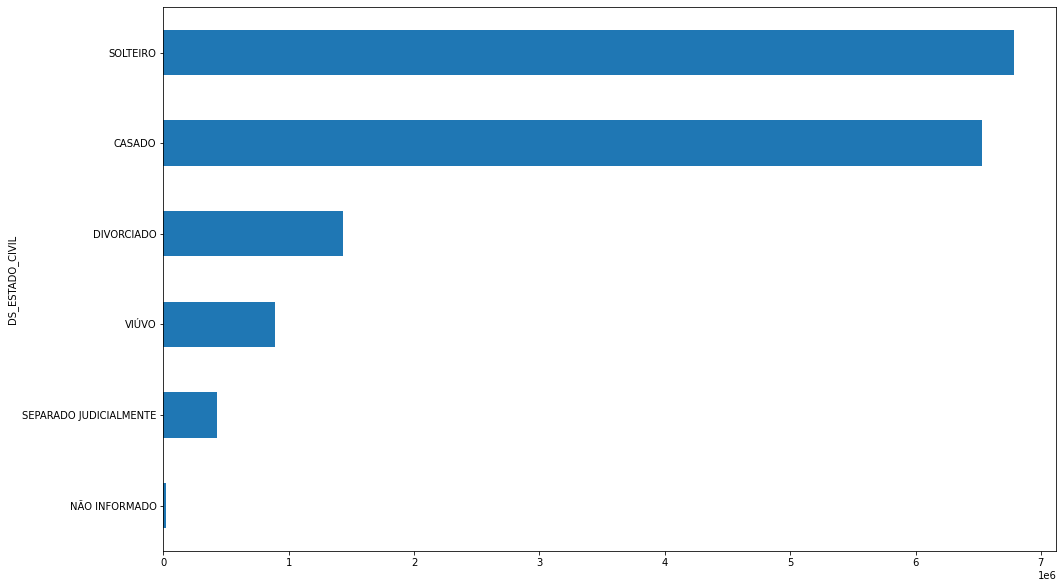

In [145]:
df.groupby('DS_ESTADO_CIVIL').size().sort_values().plot(kind='barh', figsize=(16,10))

## Definição da Tabela de Escolaridade Declarada

Criação da tabela de escolaridade declarada, selecionando a coluna DS_GRAU_ESCOLARIDADE do dataframe de eleitorado.

In [197]:
TabelaEscolaridadeDeclarada = df['DS_GRAU_ESCOLARIDADE']

Ajustando tabela para exibir a contagem por grupo e ordenada.

In [198]:
TabelaEscolaridadeDeclaradaOrdenada = TabelaEscolaridadeDeclarada.value_counts()

In [199]:
TabelaEscolaridadeDeclarada

0                       SUPERIOR COMPLETO
1                              ANALFABETO
2           ENSINO FUNDAMENTAL INCOMPLETO
3                            LÊ E ESCREVE
4                   ENSINO MÉDIO COMPLETO
                        ...              
16089458              SUPERIOR INCOMPLETO
16089459                       ANALFABETO
16089460    ENSINO FUNDAMENTAL INCOMPLETO
16089461      ENSINO FUNDAMENTAL COMPLETO
16089462          ENSINO MÉDIO INCOMPLETO
Name: DS_GRAU_ESCOLARIDADE, Length: 16089463, dtype: object

Gráfico de exibição dos dados de eleitores por escolaridade declarada.

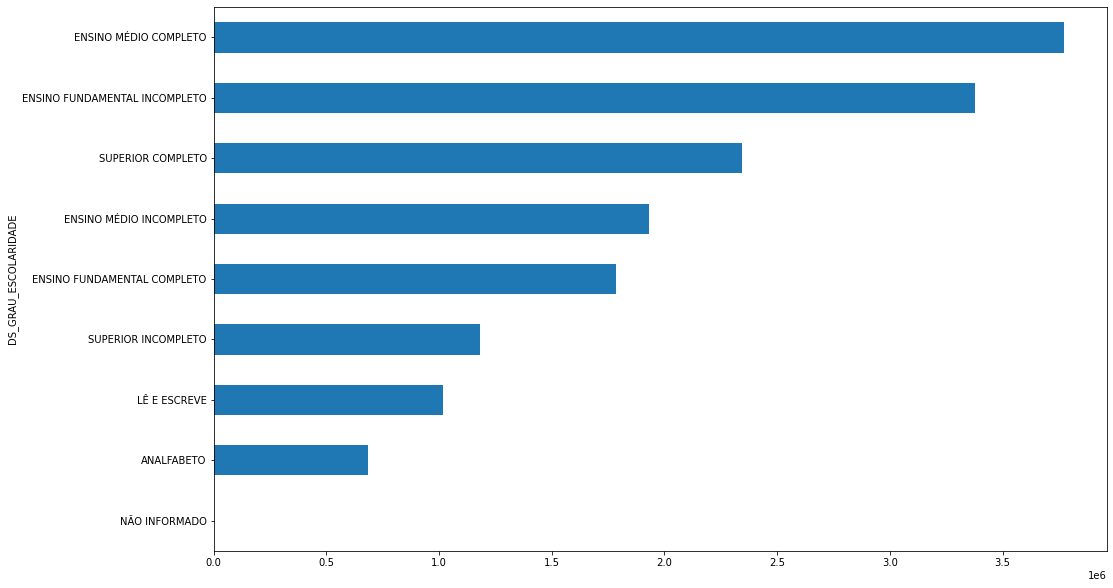

In [200]:
df.groupby('DS_GRAU_ESCOLARIDADE').size().sort_values().plot(kind='barh', figsize=(16,10))

## Definição do Valor de Nome Social

Quantitativo de eleitores aptos que solicitaram inclusão de nome social em seu cadastrado junto à justiça eleitoral.

In [146]:
TabelaNomeSocial = df['QT_ELEITORES_INC_NM_SOCIAL']

In [147]:
TabelaNomeSocialOrdenada = TabelaNomeSocial.value_counts().sort_index()

In [148]:
TabelaNomeSocialOrdenada

0    16086348
1        3108
2           7
Name: QT_ELEITORES_INC_NM_SOCIAL, dtype: int64

## Definição da Tabela de Gênero

Criação da tabela de gênero declarado, selecionando a coluna DS_GENERO do dataframe de eleitorado.

In [149]:
TabelaGenero = df['DS_GENERO']

Ajustando tabela para exibir a contagem por grupo e ordenada.

In [150]:
TabelaGeneroOrdenada = TabelaGenero.value_counts().sort_index()

In [151]:
TabelaGeneroOrdenada

FEMININO         8726864
MASCULINO        7345708
NÃO INFORMADO      16891
Name: DS_GENERO, dtype: int64

Gráfico de exibição dos dados de eleitores por gênero declarado.

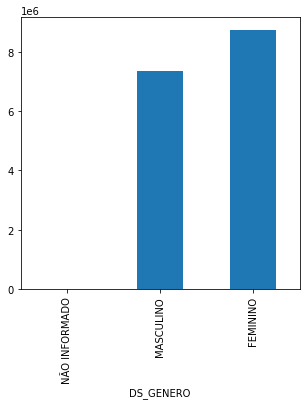

In [189]:
df.groupby('DS_GENERO').size().sort_values().plot(kind='bar', figsize=(5,5))

## Definição da Tabela Faixa Etária de Comparação

Aqui foi feita como exemplo a comparação dos eleitores dos municípios de São José dos Campos e Jacareí,</p>
agrupados por faixa etária declarada.

In [159]:
TabelaFaixaEtariaComparativa = ['DS_FAIXA_ETARIA', 'NM_MUNICIPIO']

In [157]:
TabelaFaixaEtariaComparativa

['DS_FAIXA_ETARIA', 'NM_MUNICIPIO']

In [160]:
TabelaFaixaEtariaComparativa = df.filter(items=['DS_FAIXA_ETARIA', 'NM_MUNICIPIO']).count()

In [161]:
TabelaFaixaEtariaComparativa

DS_FAIXA_ETARIA    16089463
NM_MUNICIPIO       16089463
dtype: int64

In [166]:
df['NM_MUNICIPIO'].value_counts().sort_index()

ADAMANTINA            14316
ADOLFO                 2364
AGUAÍ                 11199
AGUDOS                15380
ALAMBARI               2584
                      ...  
ÁGUAS DE SÃO PEDRO     2206
ÁLVARES FLORENCE       2170
ÁLVARES MACHADO        8882
ÁLVARO DE CARVALHO     1567
ÓLEO                   1430
Name: NM_MUNICIPIO, Length: 645, dtype: int64

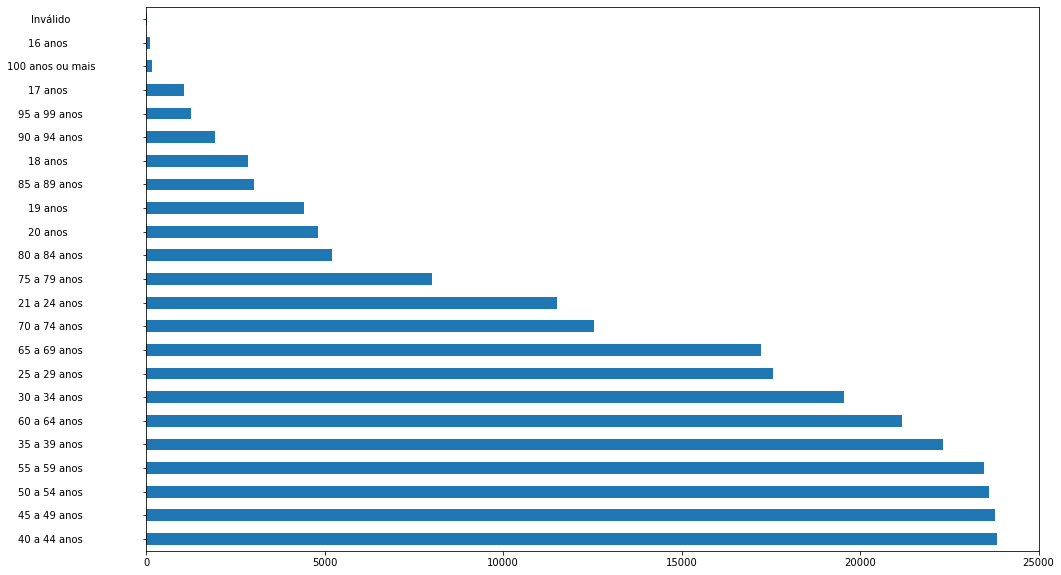

In [205]:
df.query('NM_MUNICIPIO == "SÃO JOSÉ DOS CAMPOS"')['DS_FAIXA_ETARIA'].value_counts().plot(kind='barh', figsize=(16,10))

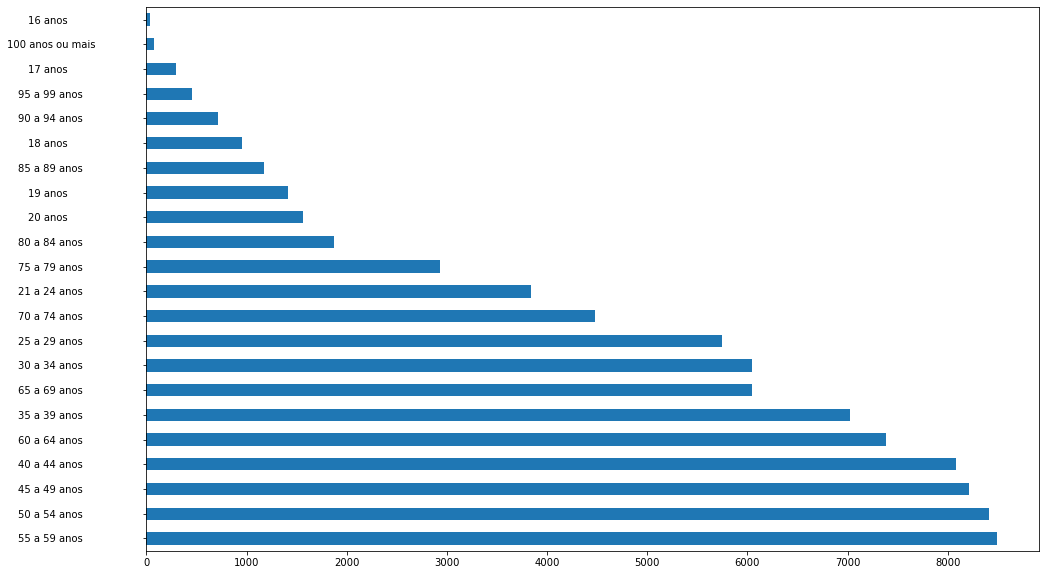

In [170]:
df.query('NM_MUNICIPIO == "JACAREÍ"')['DS_FAIXA_ETARIA'].value_counts().plot(kind='barh', figsize=(16,10))

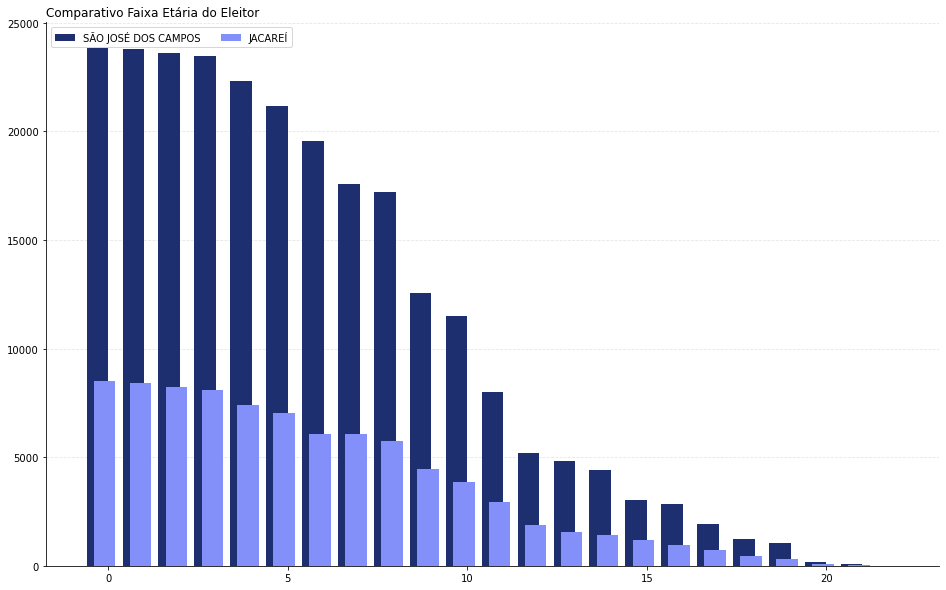

In [188]:
# Definir conjunto de dados para o plot:
comp1 = df.query('NM_MUNICIPIO == "SÃO JOSÉ DOS CAMPOS"')['DS_FAIXA_ETARIA'].value_counts()
comp2 = df.query('NM_MUNICIPIO == "JACAREÍ"')['DS_FAIXA_ETARIA'].value_counts()

## Definir Figuras:
fig, ax = plt.subplots(1, figsize=(16, 10))

#Plots
x = np.arange(0, len(comp1.index))
y = np.arange(0, len(comp2.index))

plt.bar(x - 0.3, comp1, width = 0.6, color = '#1D2F6F')
plt.bar(y - 0.1, comp2, width = 0.6, color = '#8390FA')

#comp1.plt.barh()
#comp2.plt.barh()

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)

# Título e Legendas
plt.title('Comparativo Faixa Etária do Eleitor', loc ='left')
plt.legend(['SÃO JOSÉ DOS CAMPOS', 'JACAREÍ'], loc='upper left', ncol = 4)

plt.show()